In [ ]:
import numpy as np
from glob import glob
import os 
#TODO: For LINUX:
dataset_path = '/home/tomwelch/Cambridge/Datasets/neurotransmitter_data'

#TODO: For MAC:
#dataset_path = '/Users/tomw/Documents/MVA/Internship/Cambridge/Datasets/neurotransmitter_data'

dates = glob(os.path.join(dataset_path, '*'))
neurotransmitters = list(map(lambda x: os.path.basename(os.path.normpath(x)), glob(os.path.join(dates[0], '*')))) #@param {type:"string"
def get_fnames():
    files, labels = [], []
    for date in dates:
        for neuro in neurotransmitters:
            fnames = glob(os.path.join(date, neuro, '*.hdf*'))
            fnames.sort()
            files.append(fnames)
            labels.append([neuro.capitalize() for _ in range(len(fnames))])
    return list(zip(np.concatenate(files), np.concatenate(labels)))

files, l = zip(*get_fnames())


import h5py
def load_image(path):
    with h5py.File(path) as f:
        pre, post = f['annotations/locations'][:]/8
        x, y, z = pre[0].astype(int), pre[1].astype(int), pre[2].astype(int)
        slice_volume = f['volumes/raw'][:][np.newaxis,:,:,z]
        return slice_volume, x, y

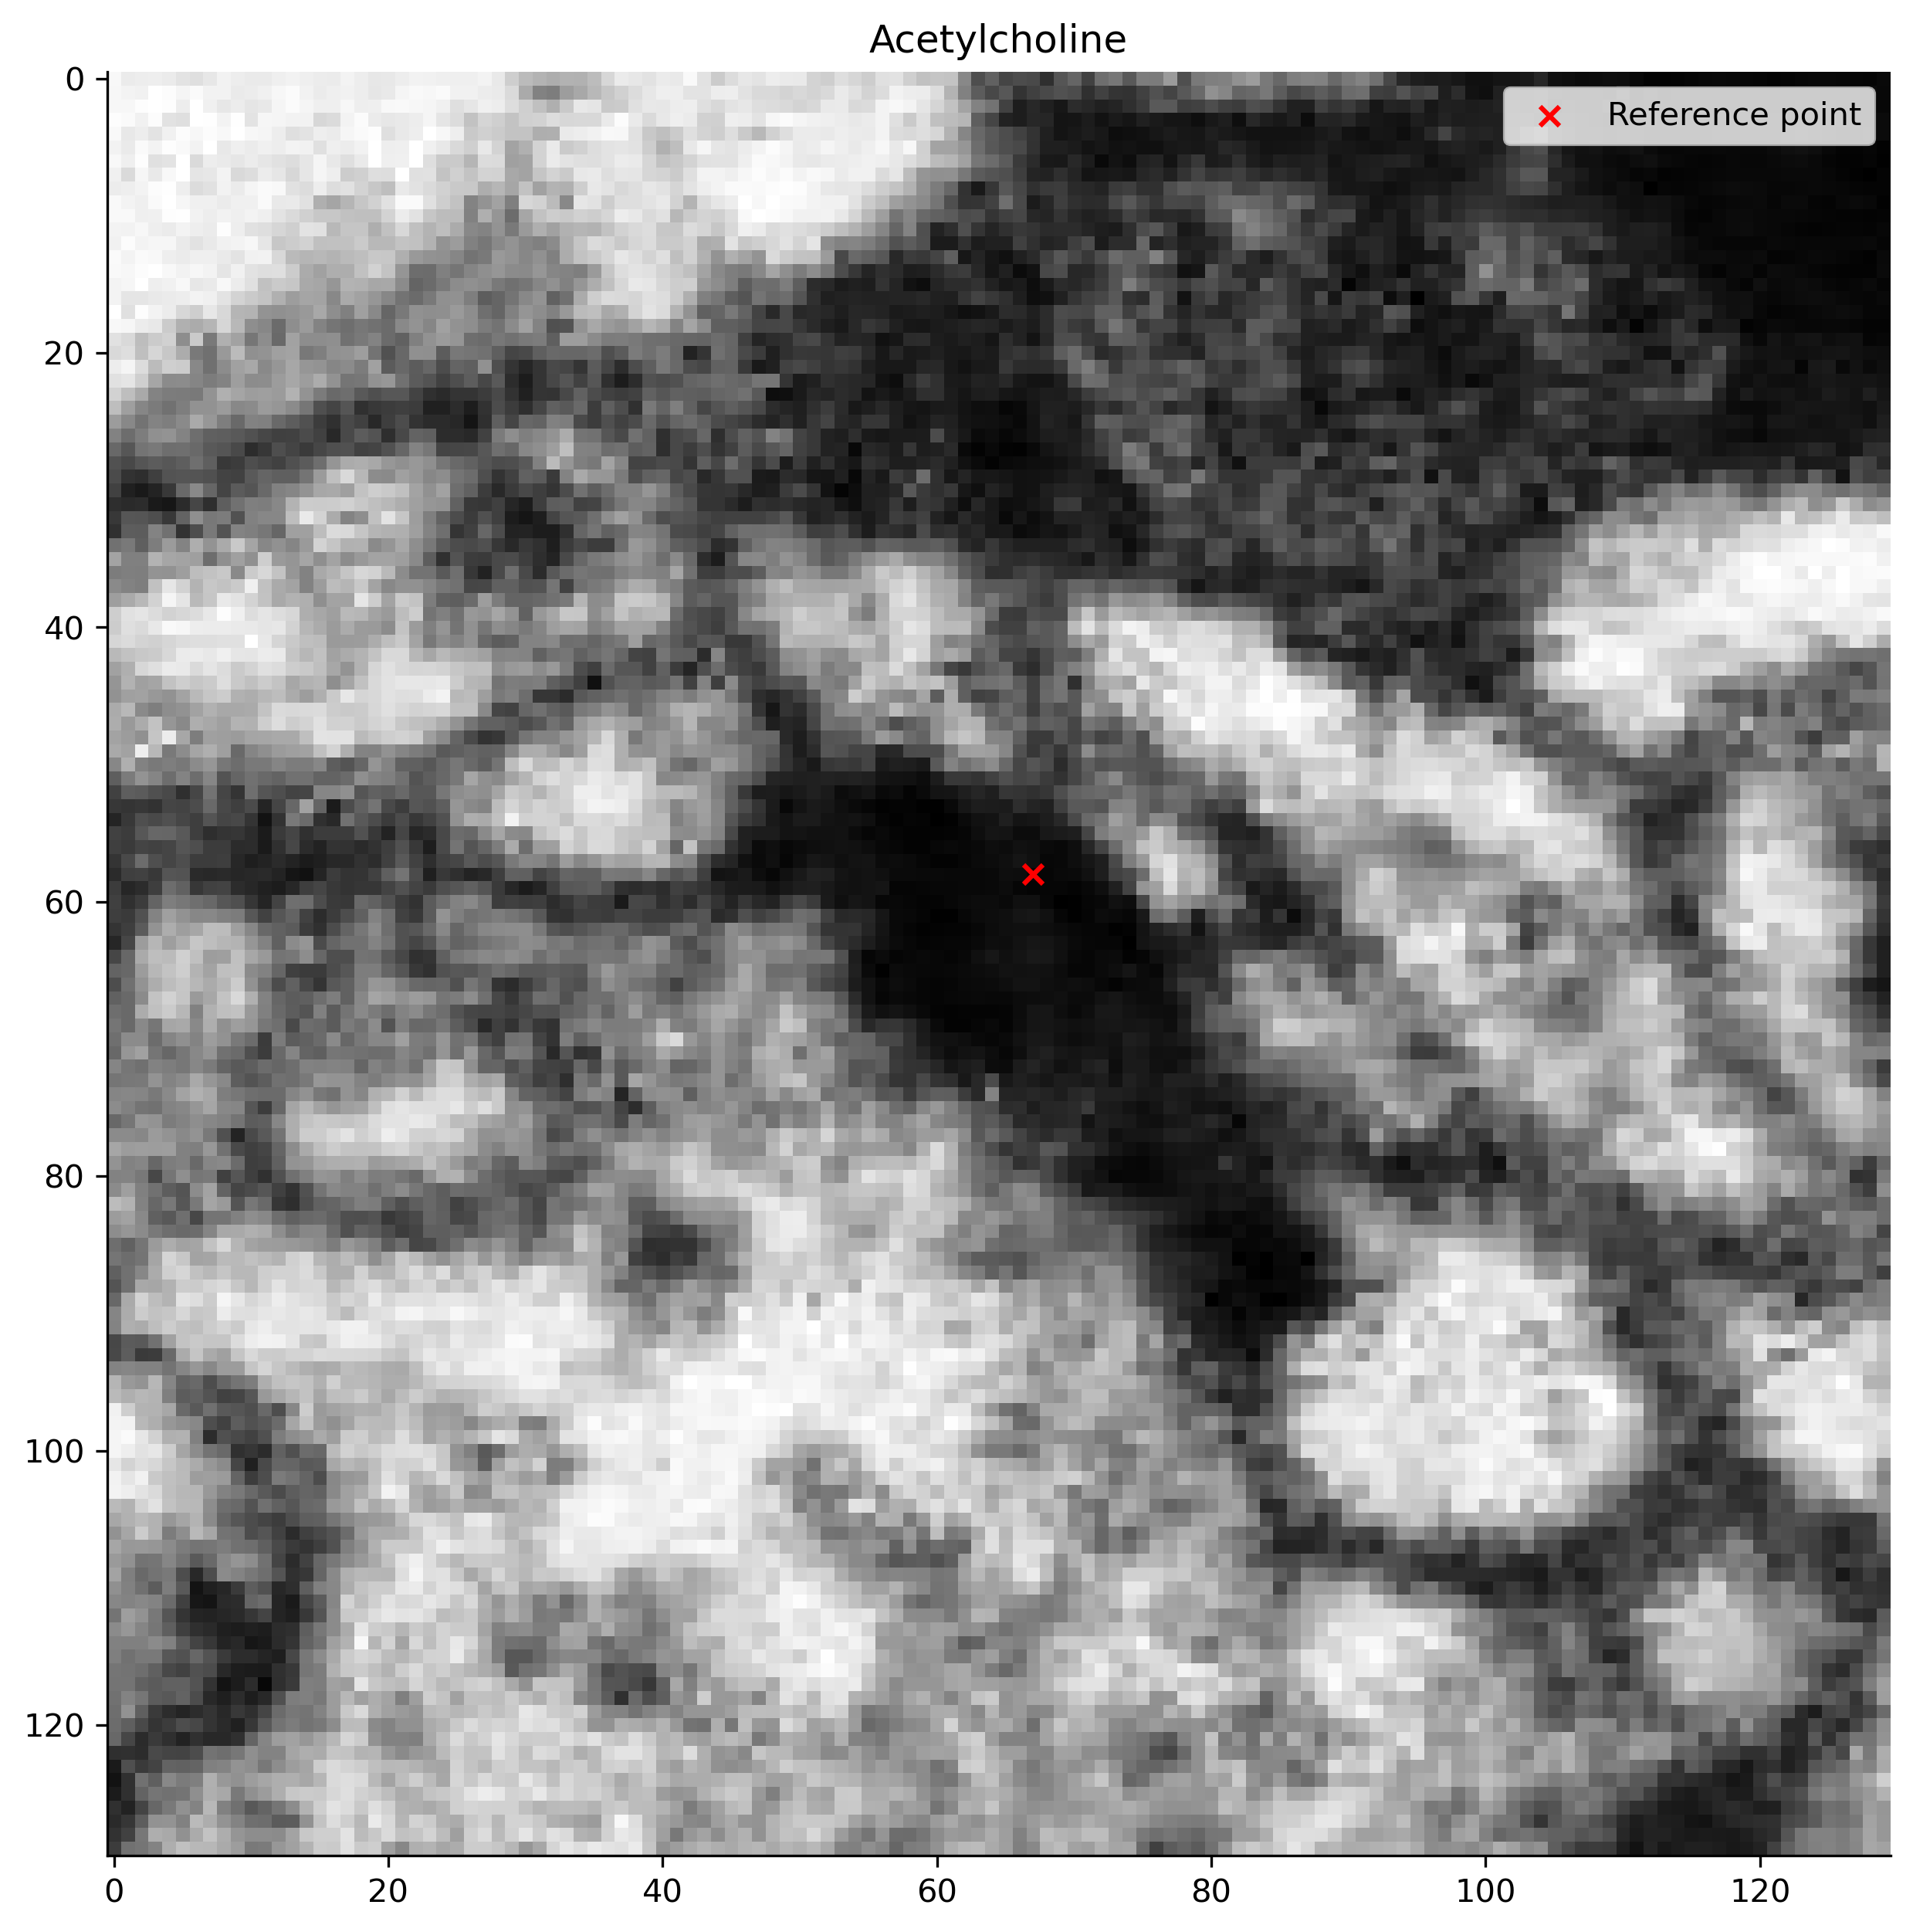

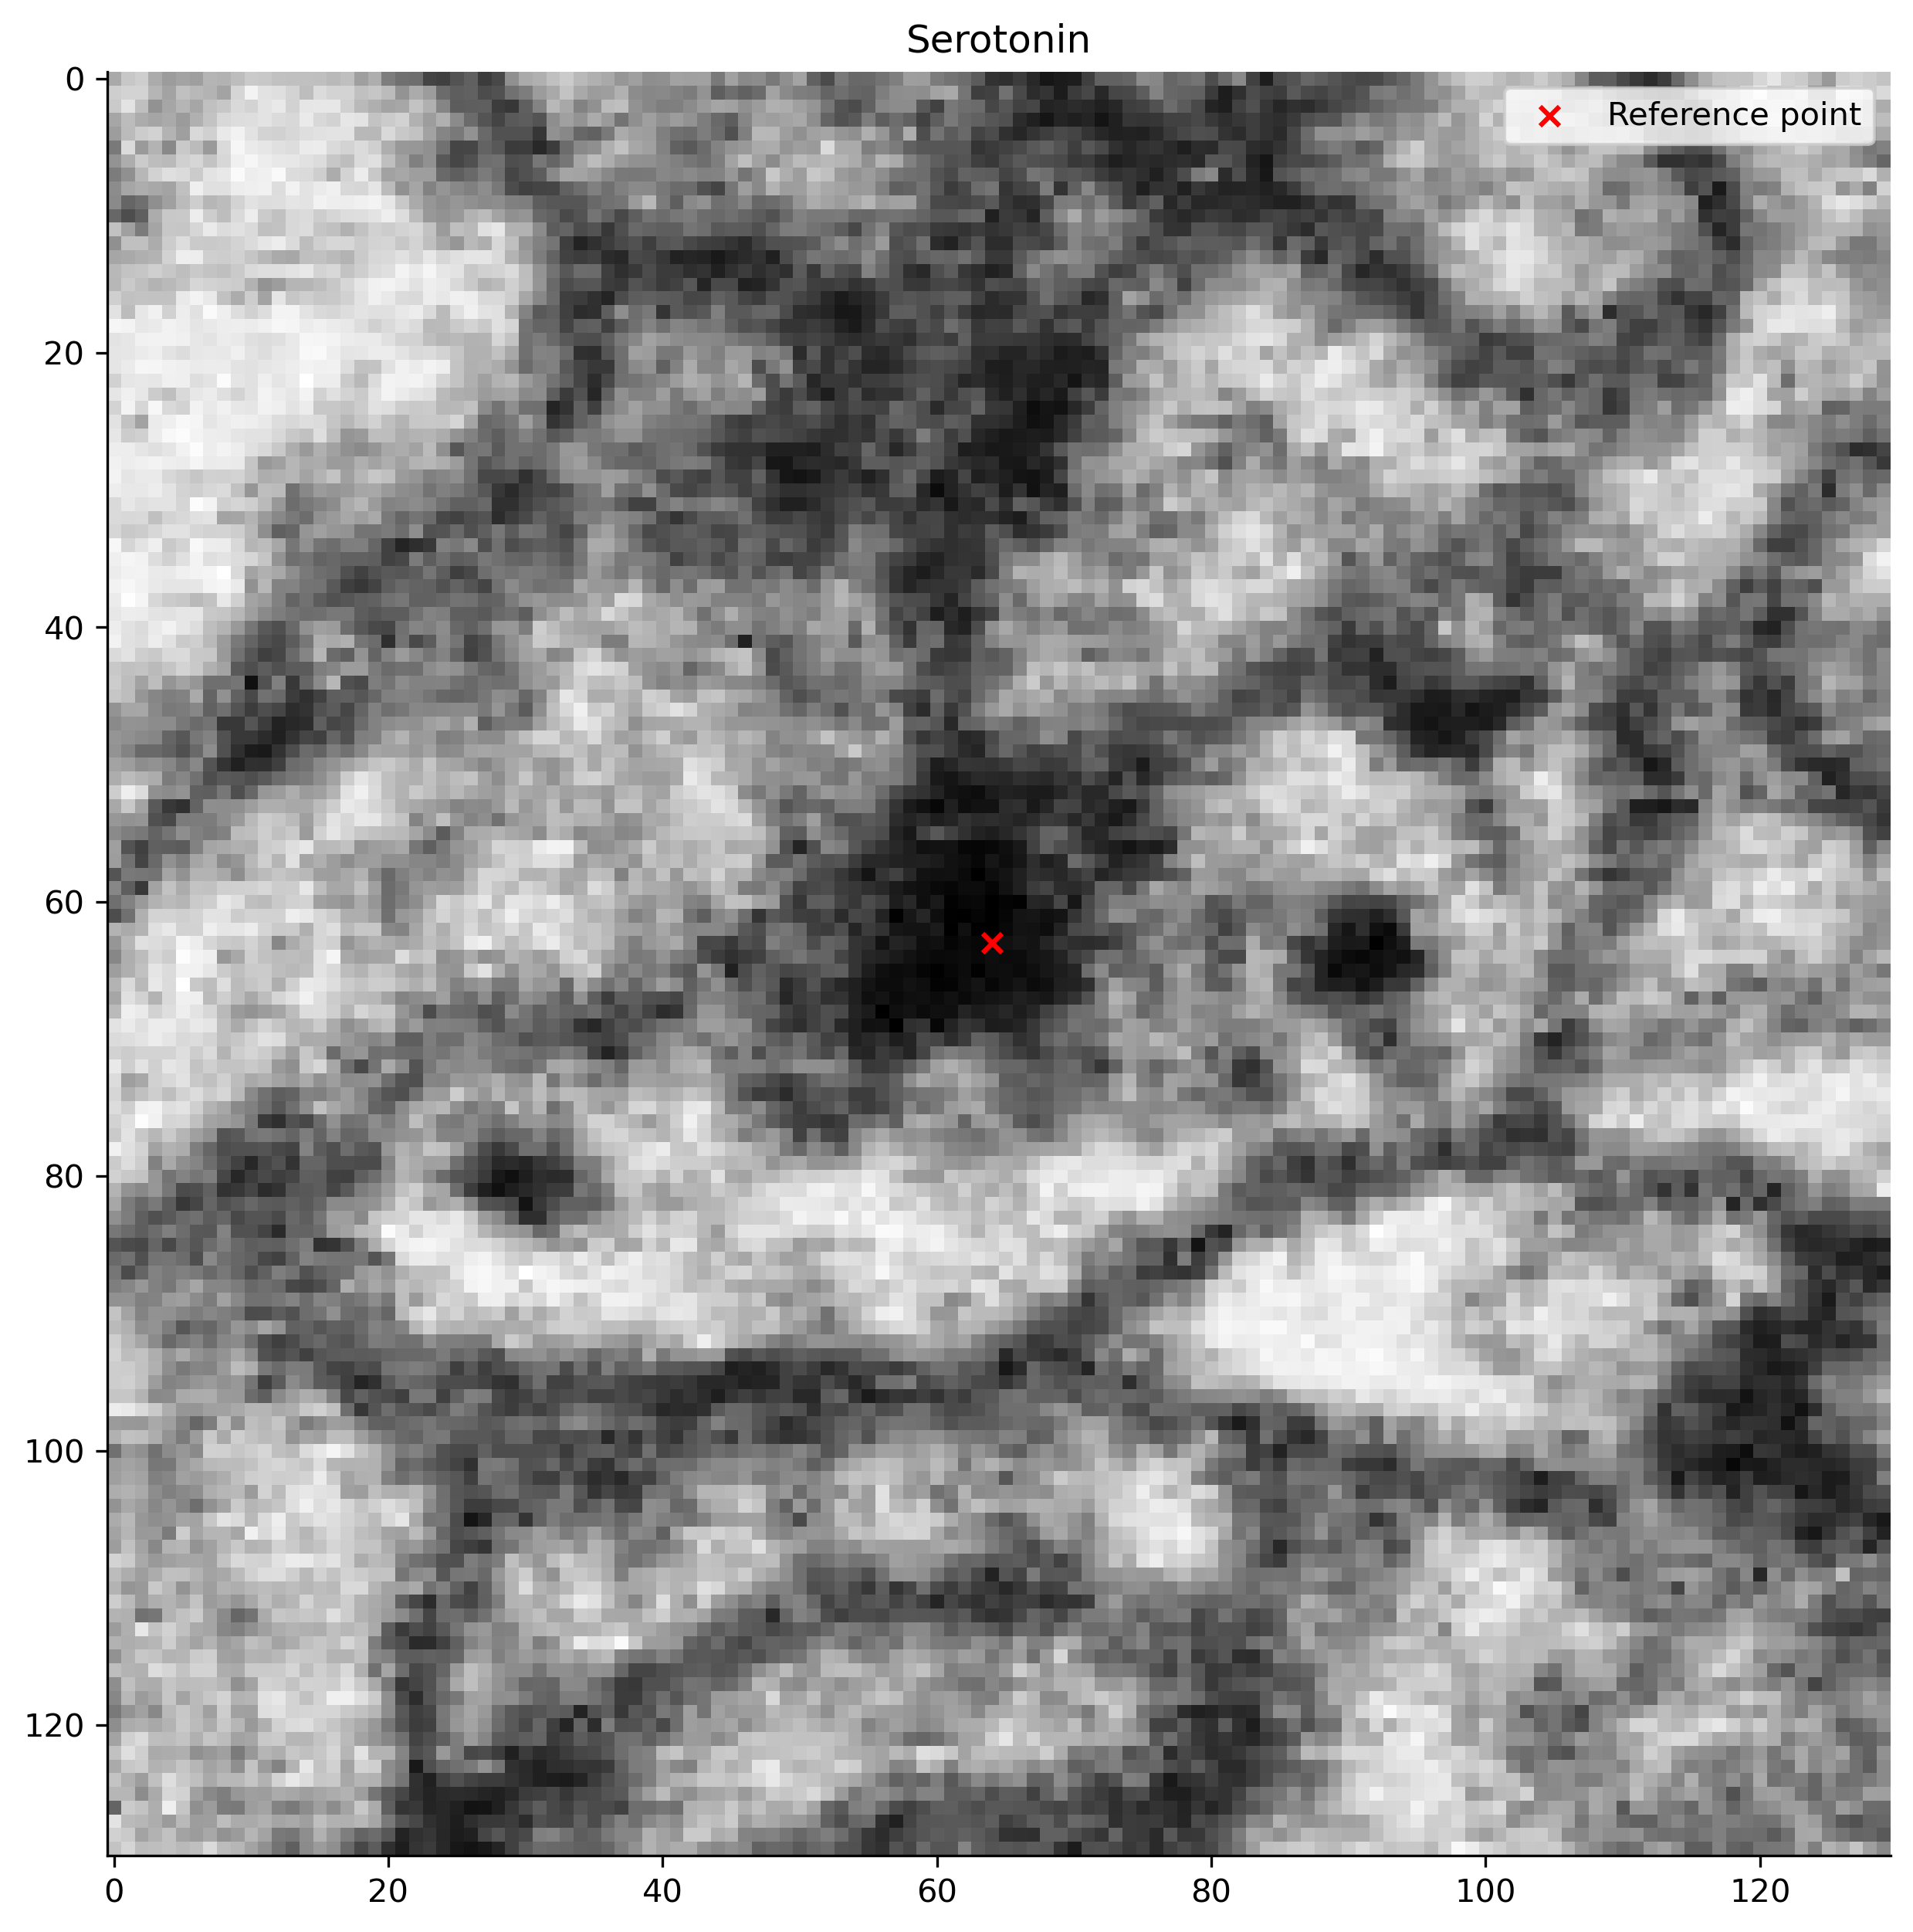

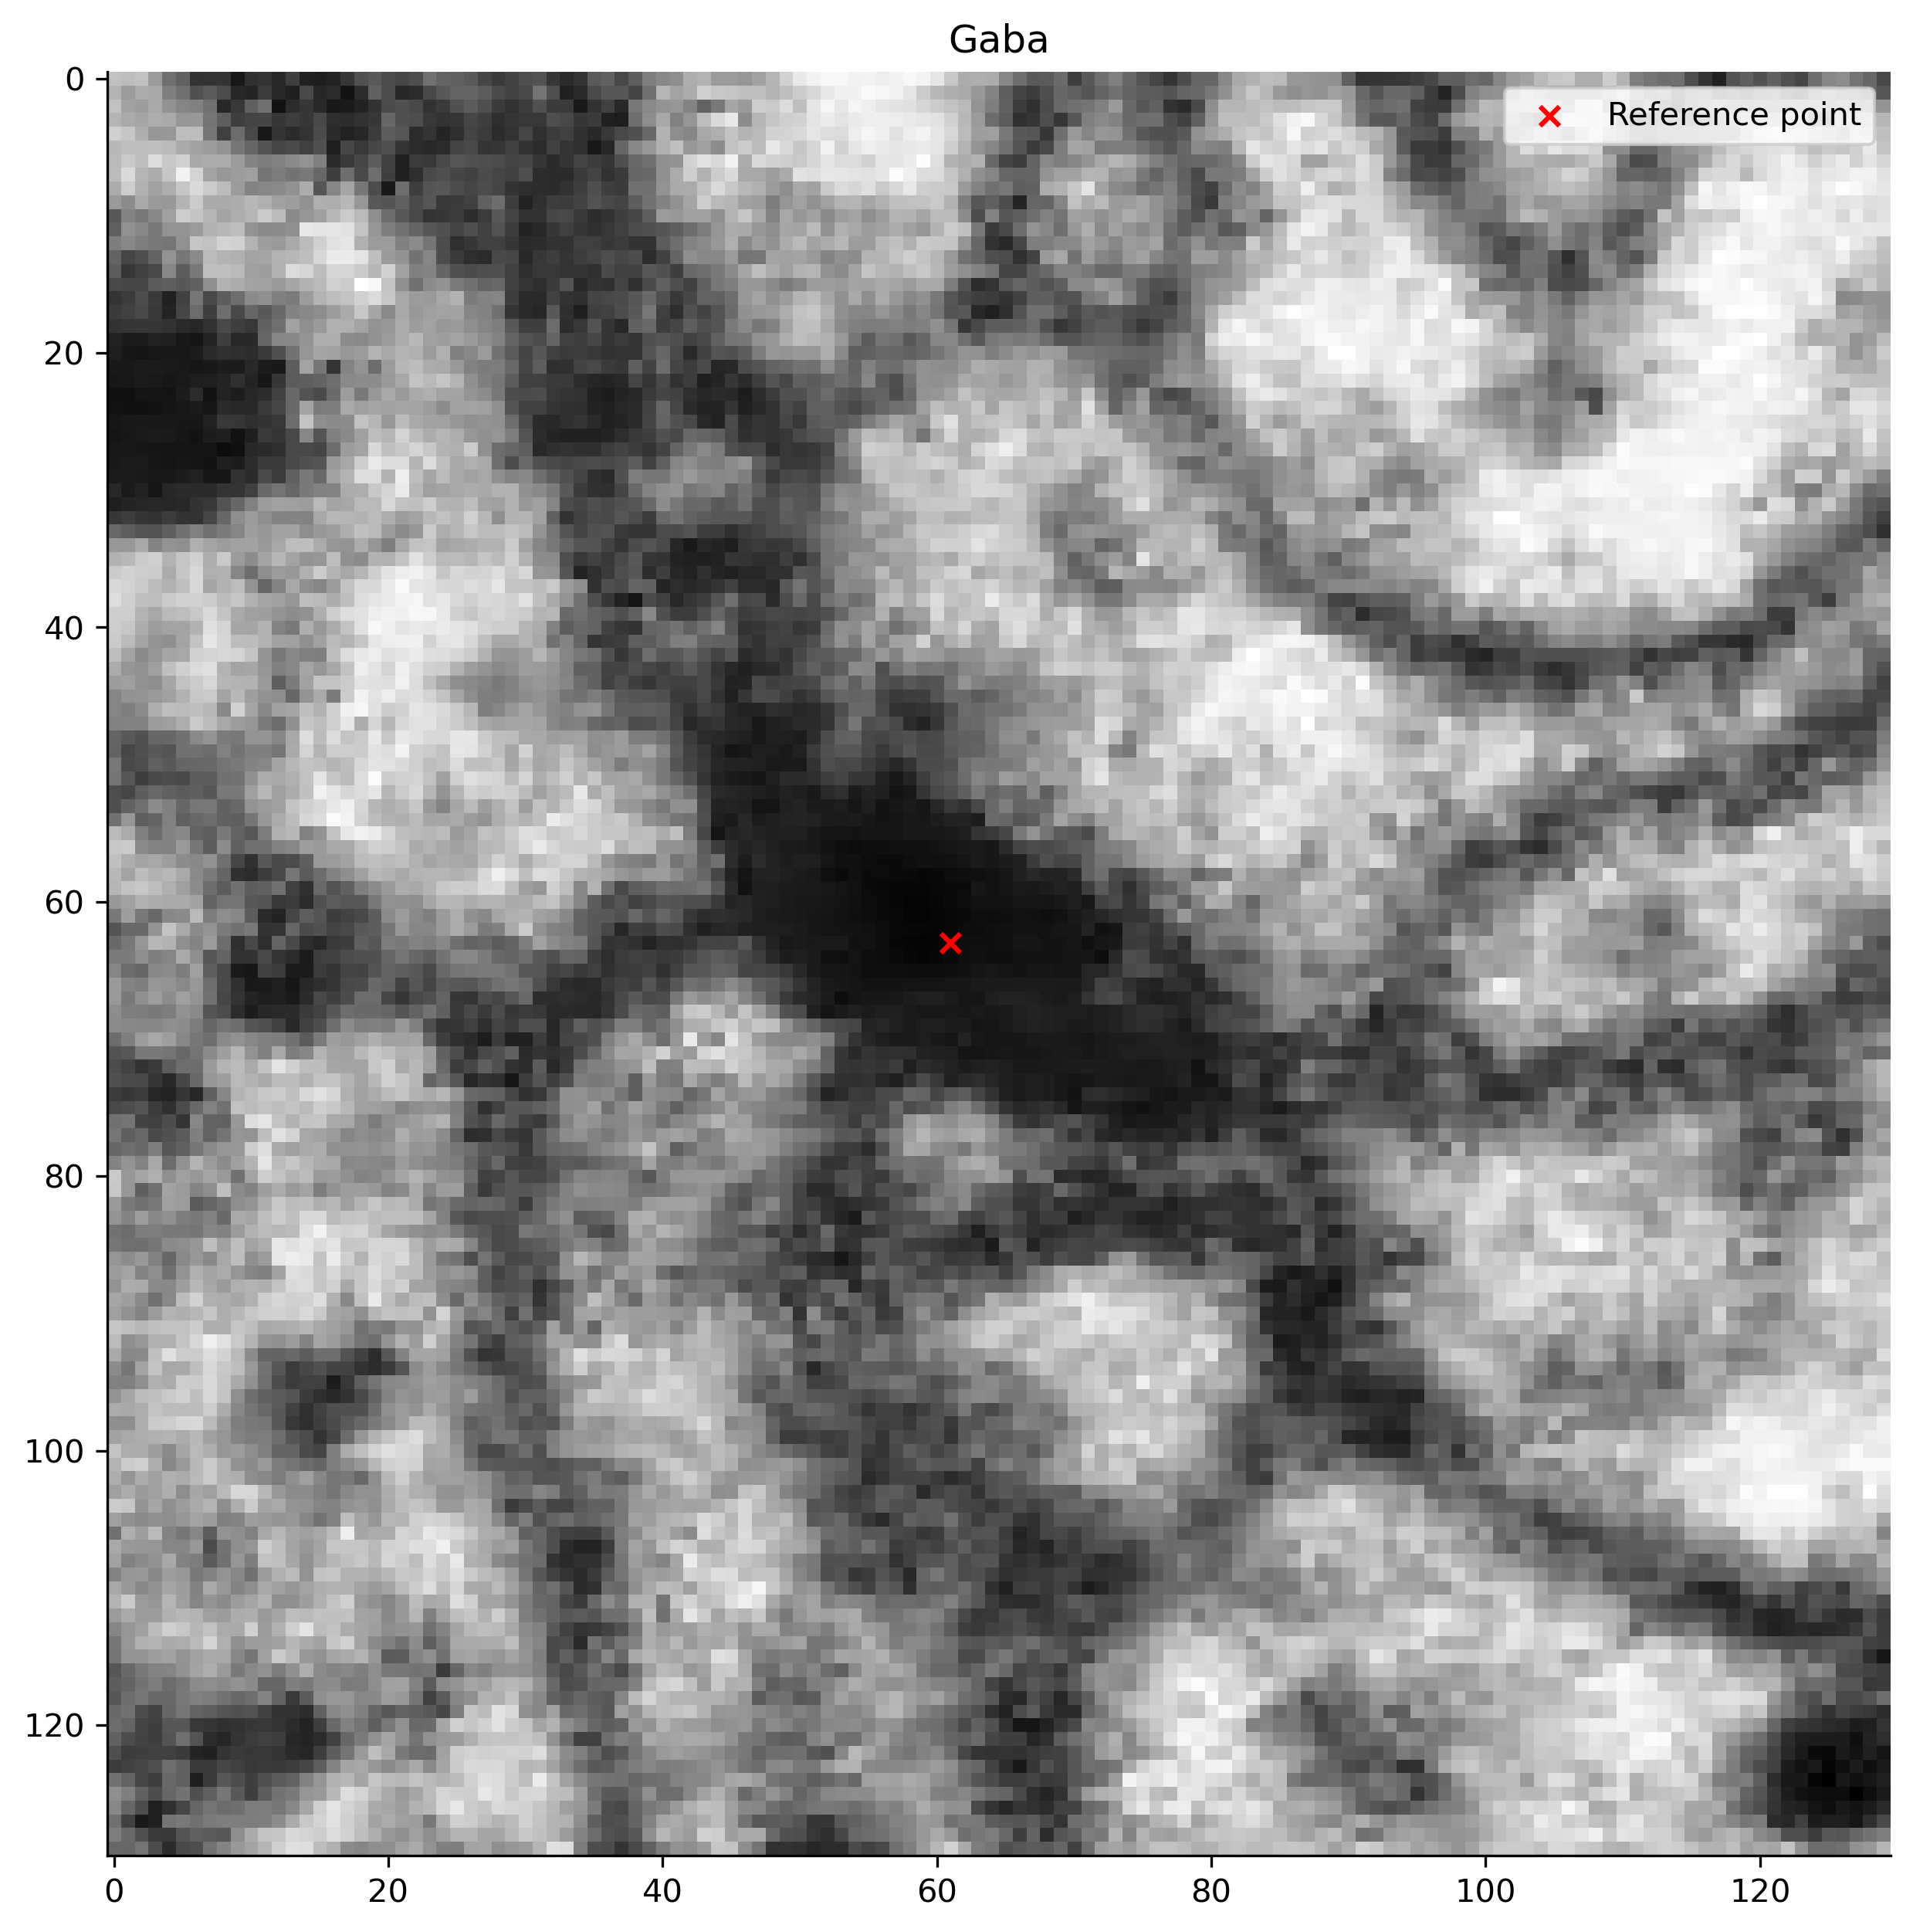

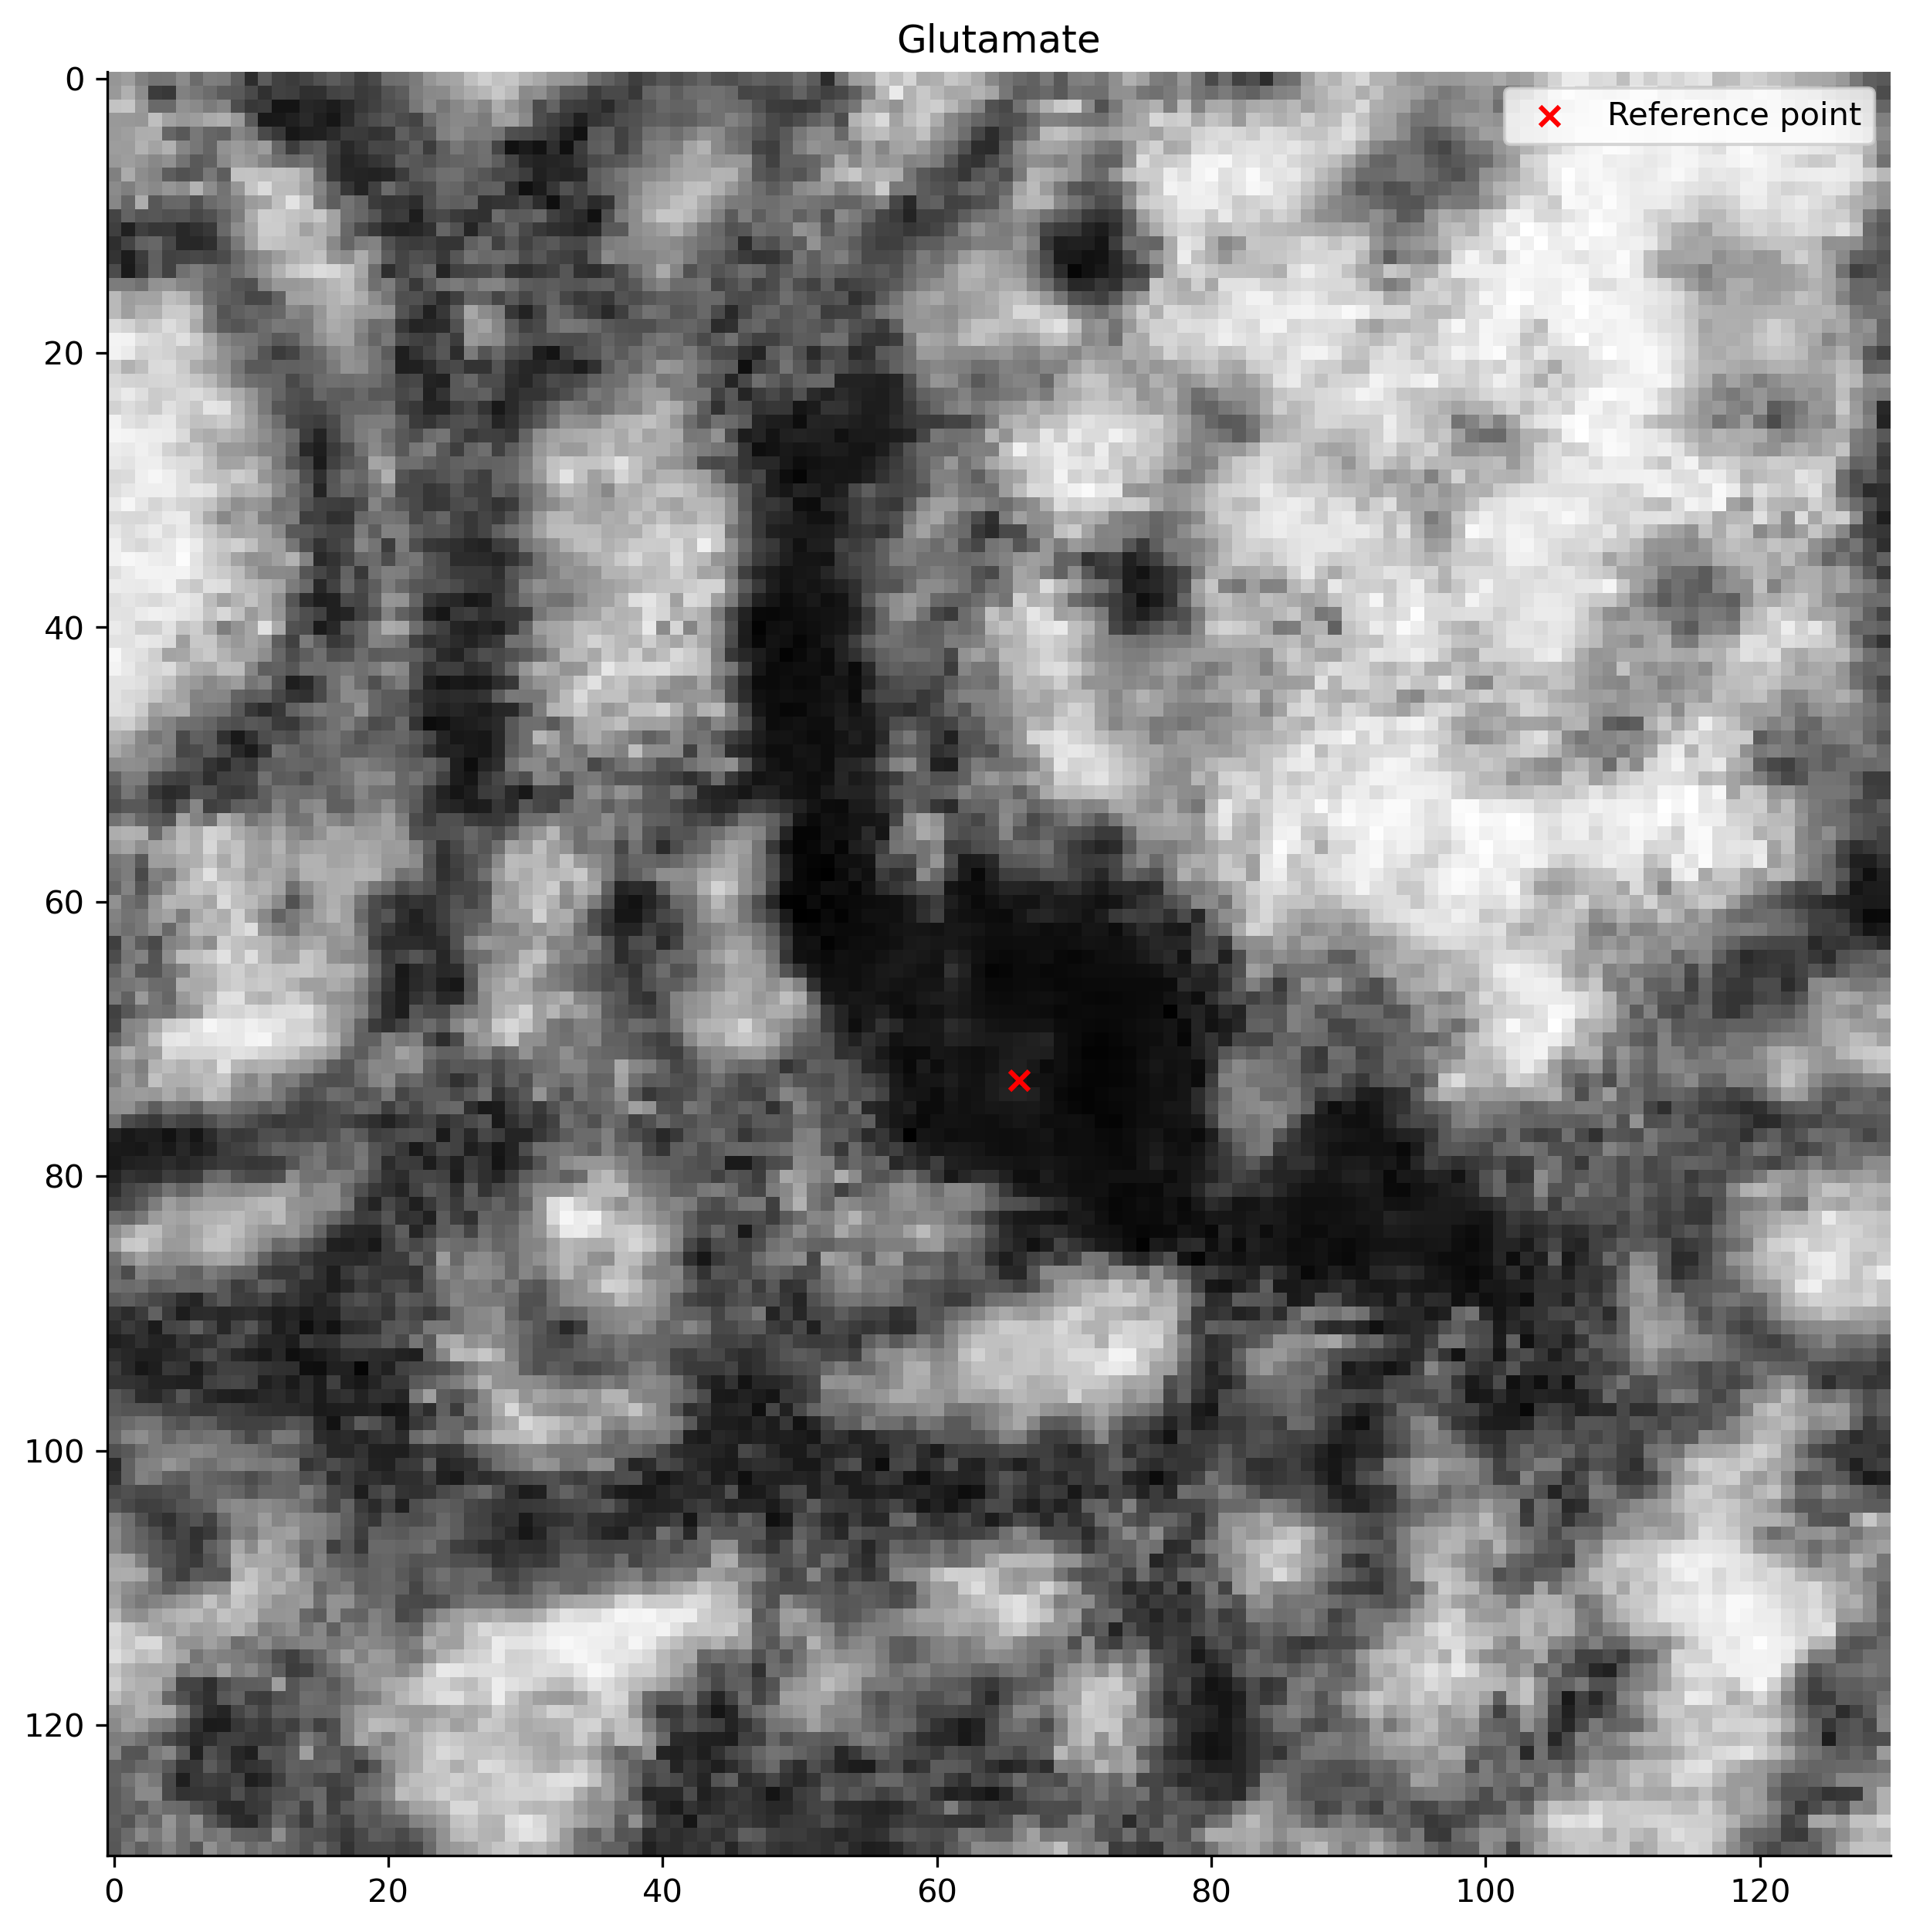

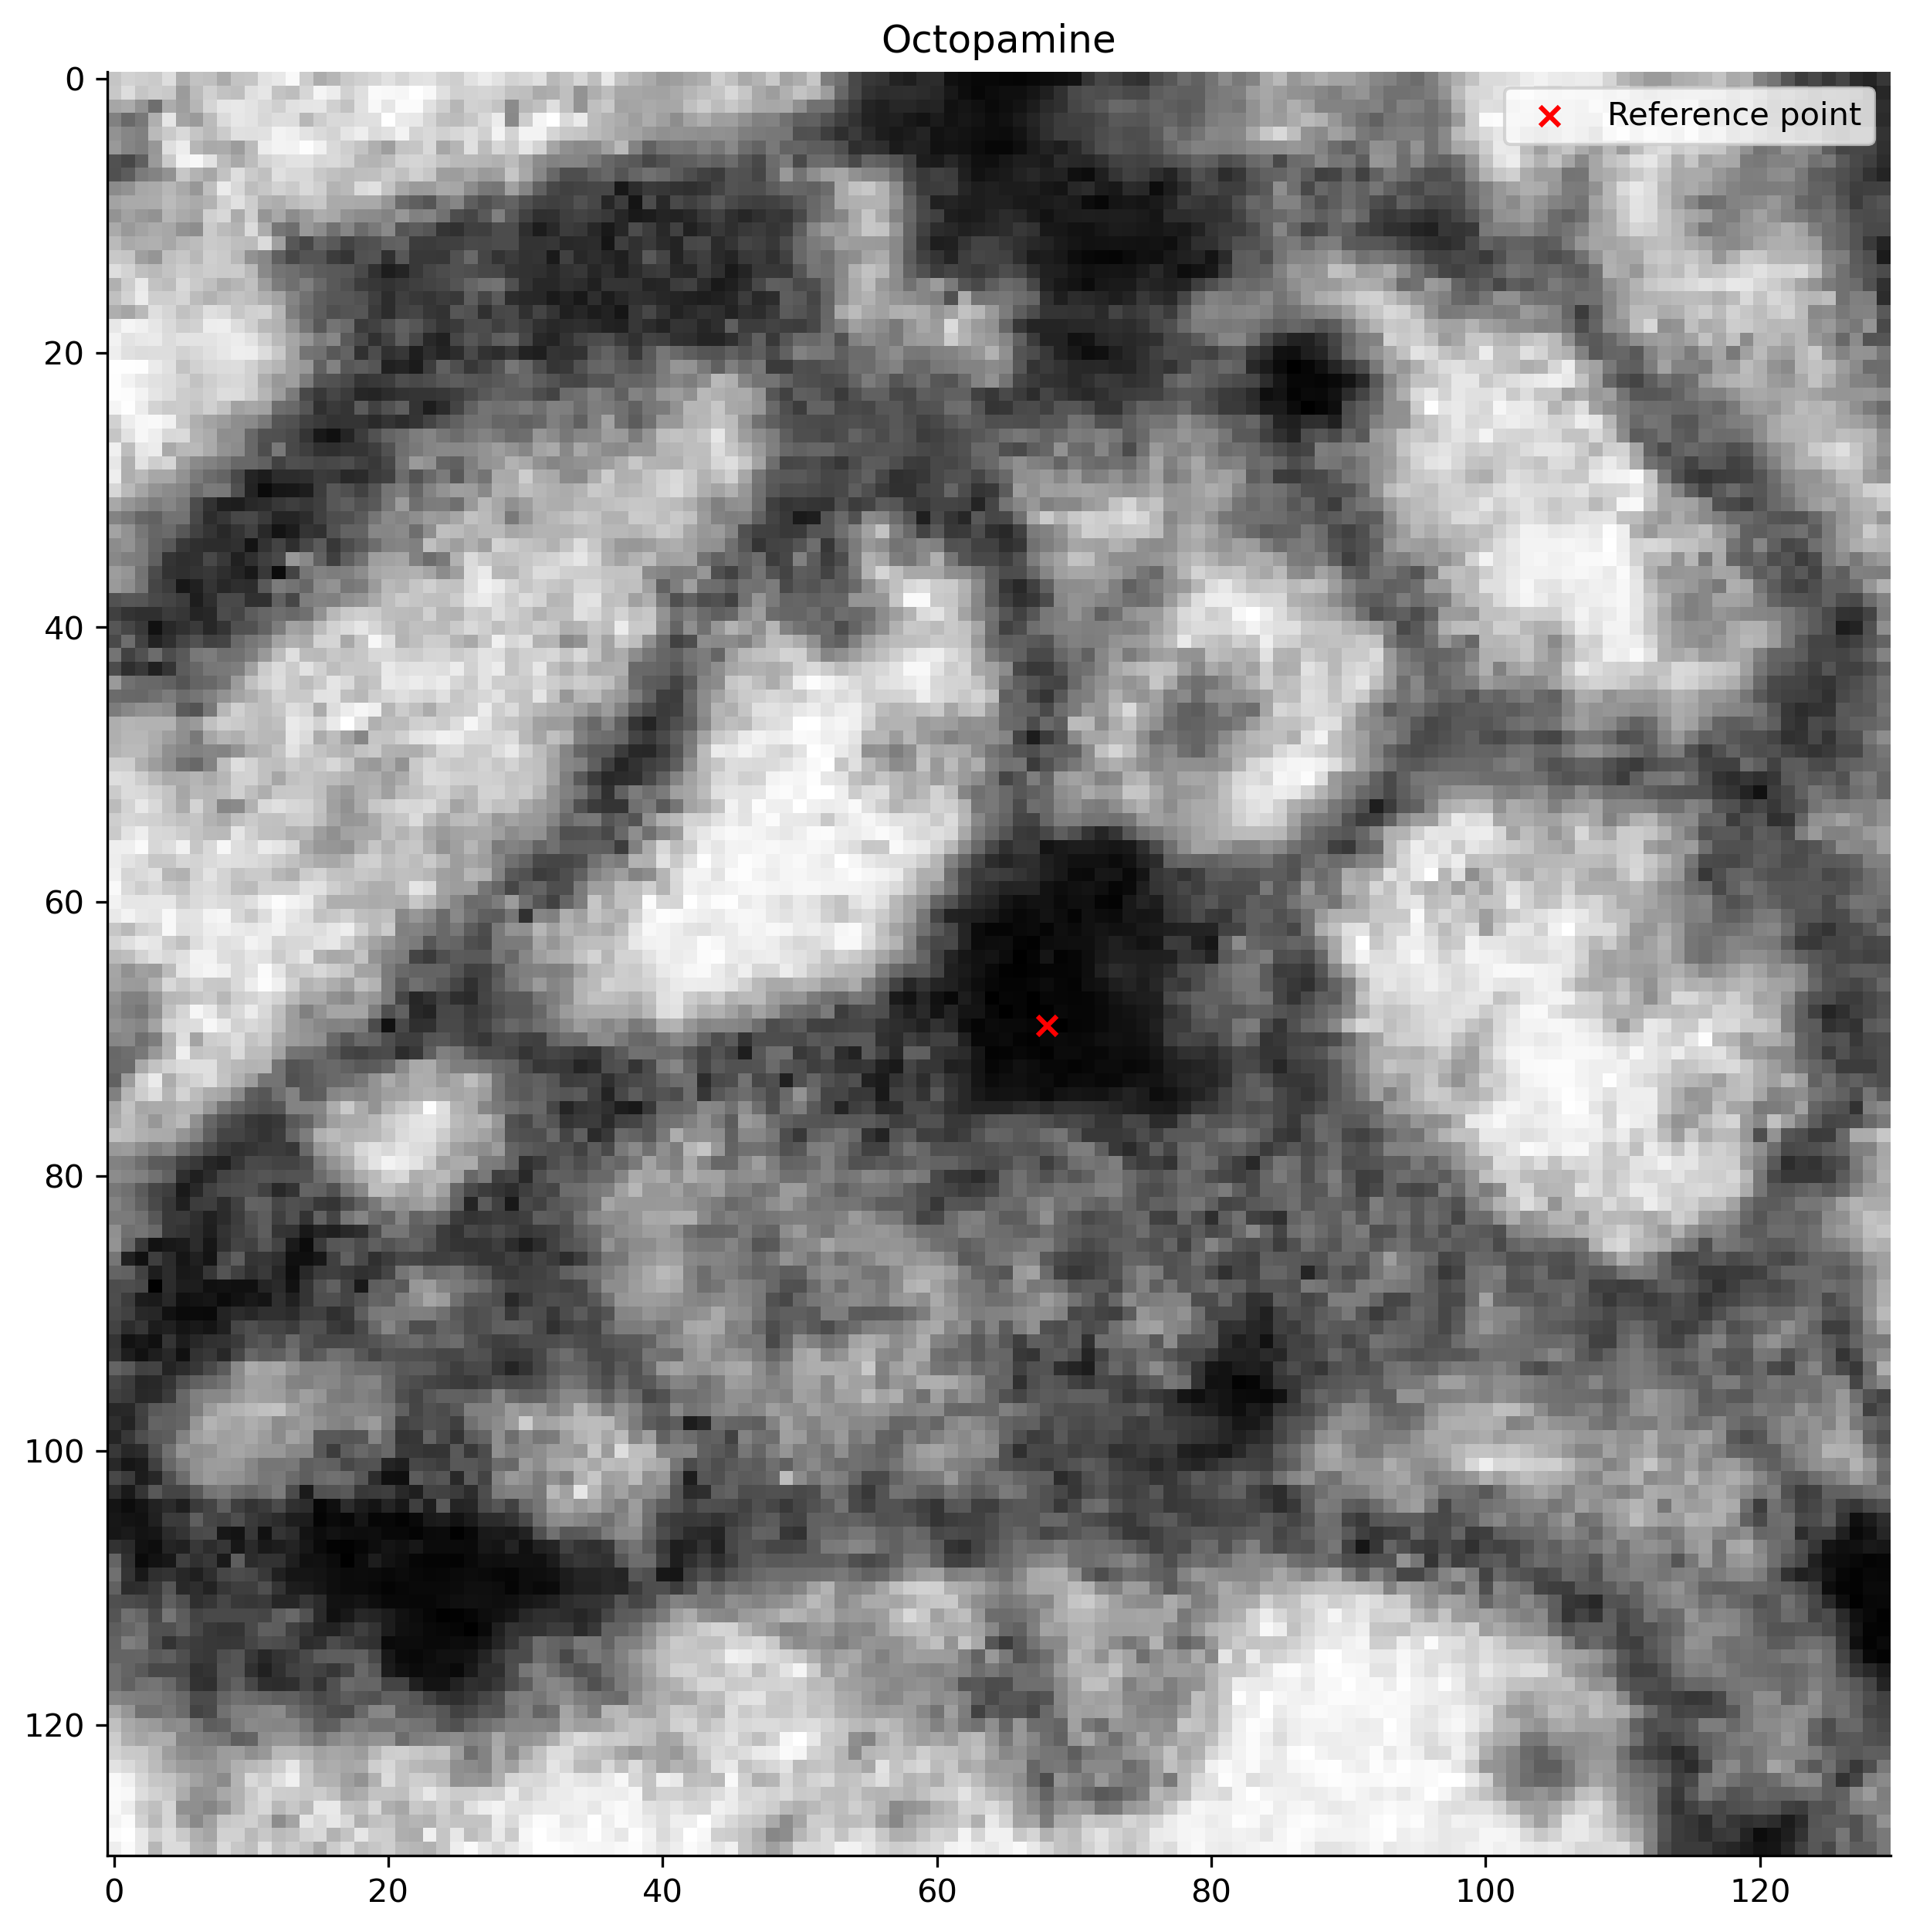

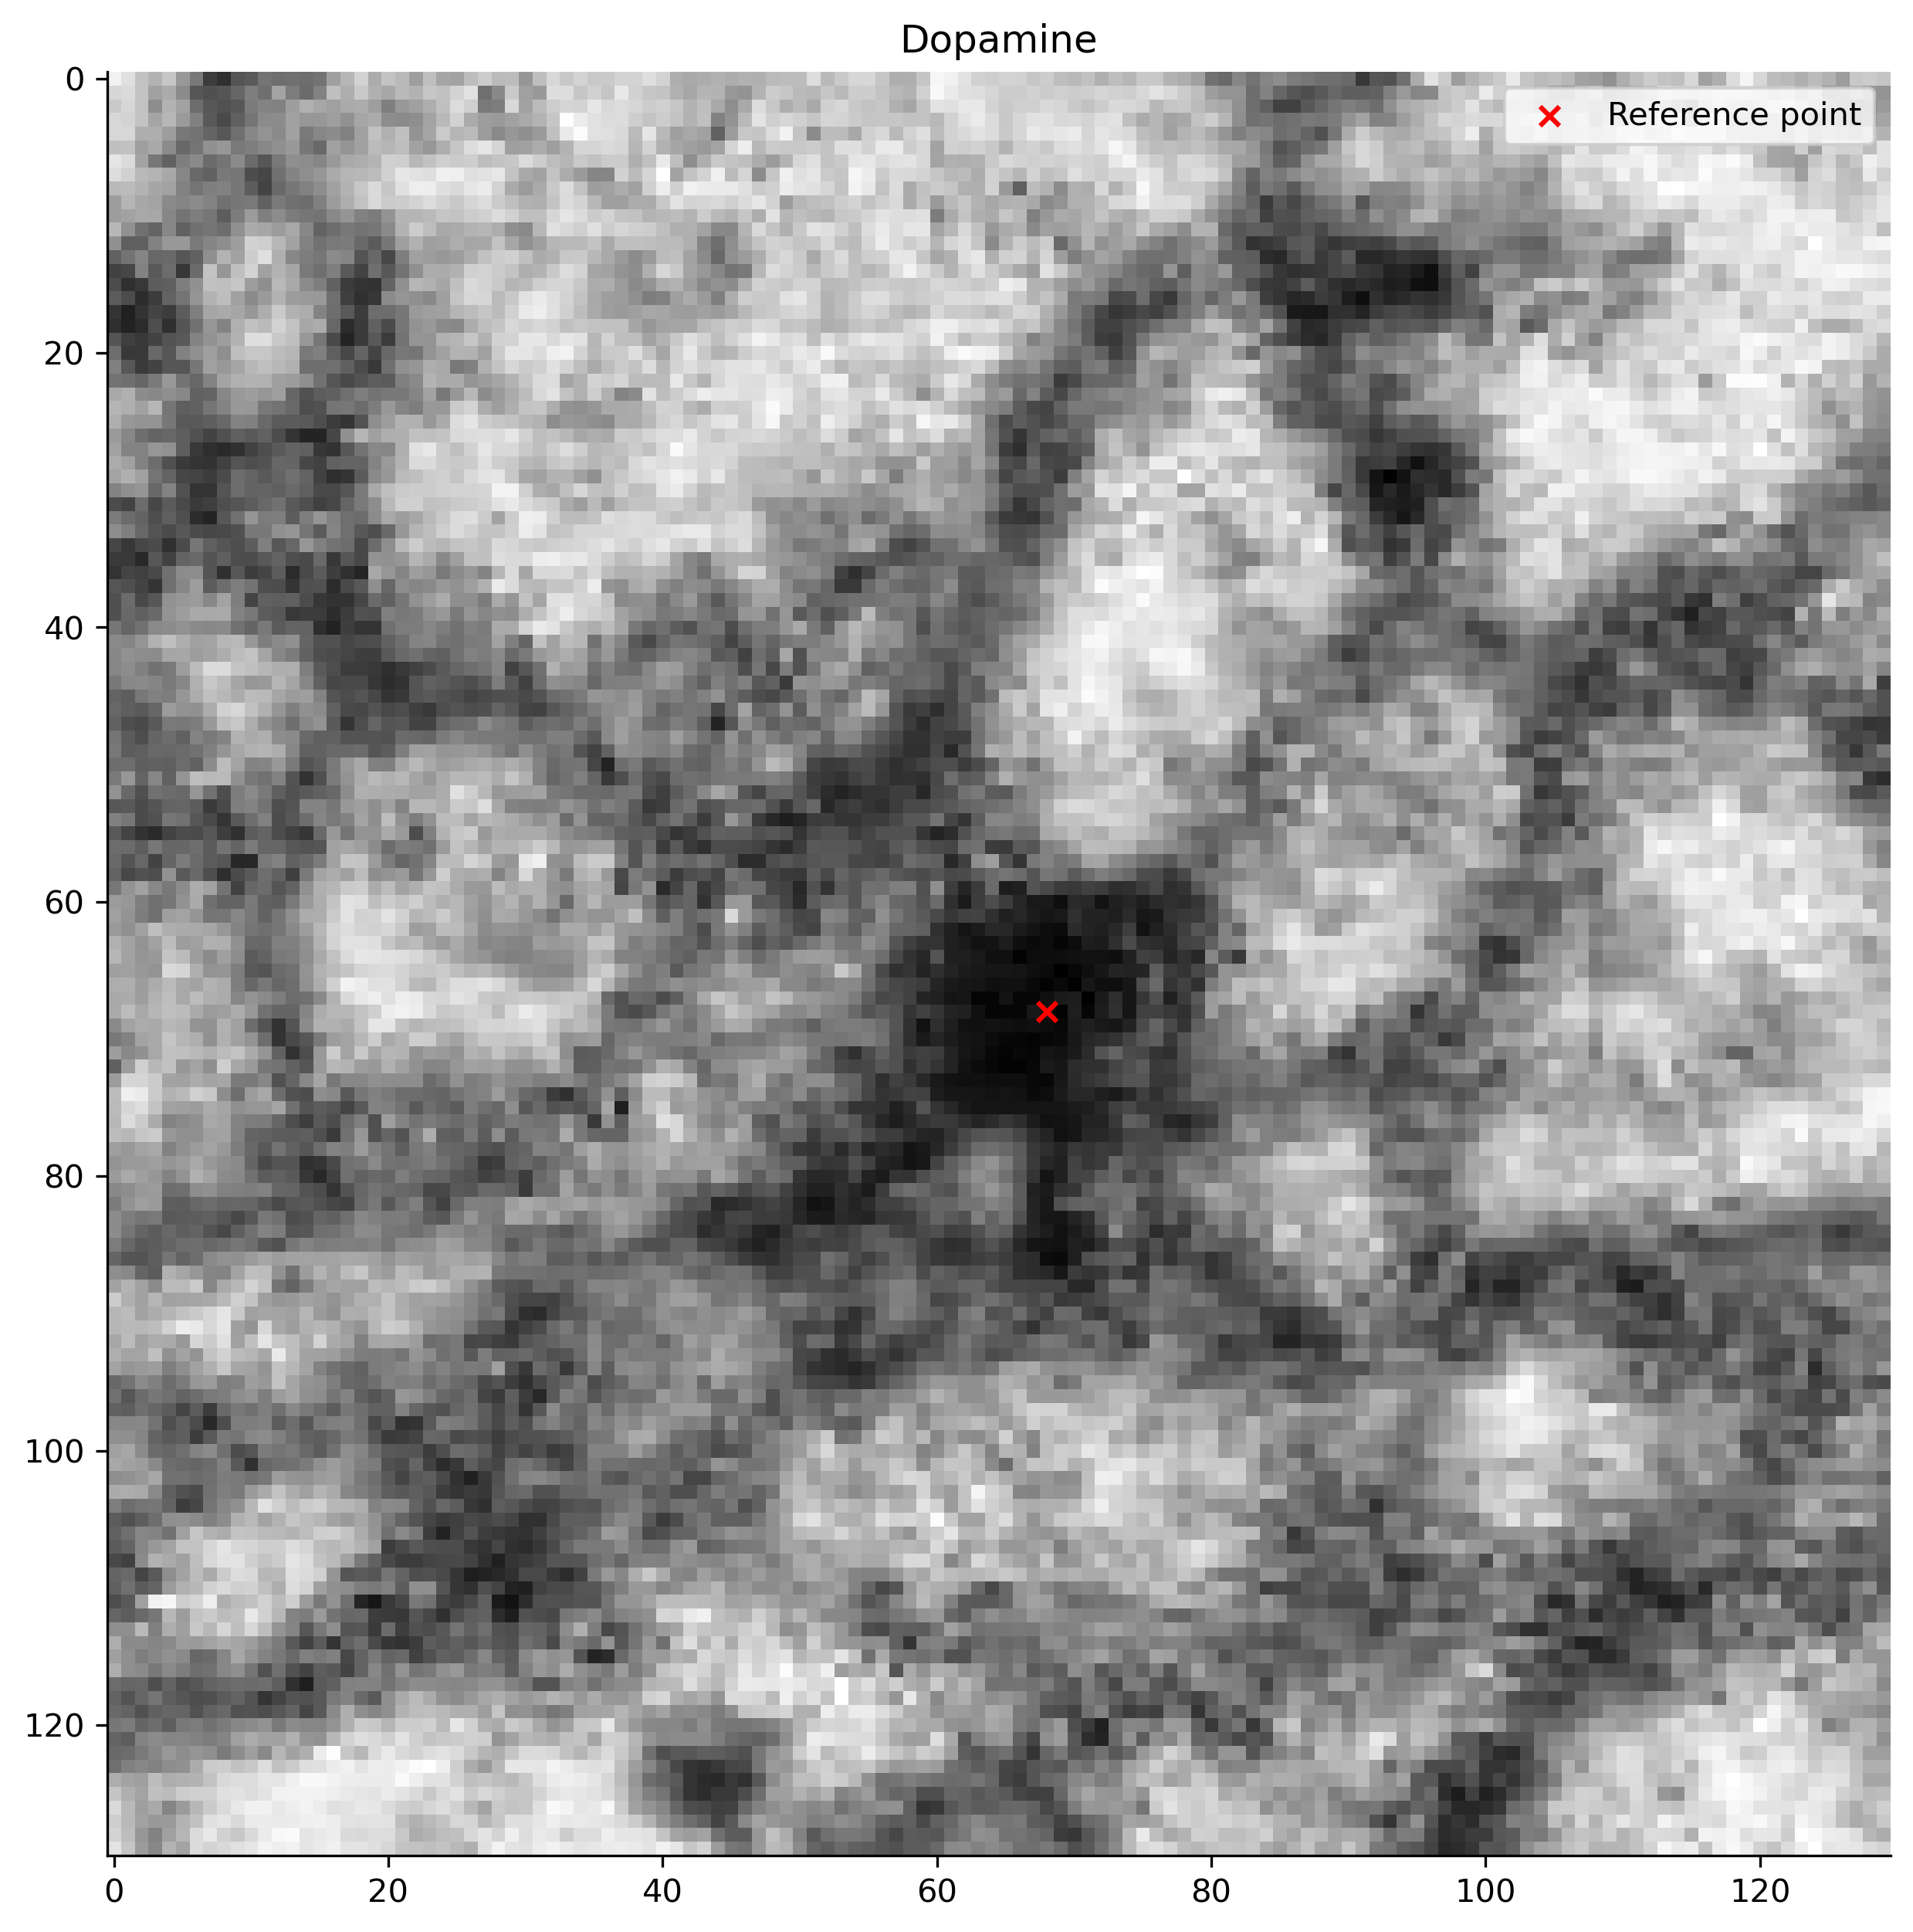

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
IDX = [17,316,617,924,1225,1512]
for k, i in enumerate(IDX):
    img, x, y = load_image(files[i])
    fig = plt.figure(figsize=(10,10), dpi=300)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.scatter(x,y, label='Reference point', c='red', marker='x')
    plt.title(neurotransmitters[k].capitalize())
    plt.legend()
    sns.despine()
    fig.savefig(fname=f'./figures/{k}_{i}.png')
    plt.show()

In [5]:
from glob import glob
import os
import numpy as np
dataset_path = '/Users/tomw/Documents/MVA/Internship/Cambridge/Datasets/neurotransmitter_data'

dates = glob(os.path.join(dataset_path, '*'))
neurotransmitters = list(map(lambda x: os.path.basename(os.path.normpath(x)), glob(os.path.join(dates[0], '*')))) #@param {type:"string"} 
def get_fnames():
    files_list, labels_list = [], []
    for date in dates:
        for neuro in neurotransmitters:
            fnames = glob(os.path.join(date, neuro, '*.hdf*'))
            files_list.append(fnames)
            labels_list.append([neuro.capitalize() for _ in range(len(fnames))])
    files = sorted(np.concatenate(files_list), key=os.path.basename)
    labels = sorted(np.concatenate(labels_list), key=os.path.basename)
    return list(zip(files, labels))
f, l = zip(*get_fnames())